# COVID19 TURKEY FORECASTING

In [1]:
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
import csv

## Güncel Veri Çekme

In [95]:
%%time
tarih=[]
toplam_test=[]
toplam_vaka=[]
toplam_vefat=[]
pneumonia=[]
agir_hasta=[]
iyilesen=[]
bugun_vaka=[]
bugun_hasta=[]
bugun_test=[]
bugun_vefat=[]
bugun_iyilesen=[]


options = webdriver.ChromeOptions()
options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
chrome_driver_binary = r"C:\Users\Nafiz\Python\chromedriver_win32\chromedriver.exe"
driver = webdriver.Chrome(chrome_driver_binary, options=options)

base_url = str("https://covid19.saglik.gov.tr/TR-66935/genel-koronavirus-tablosu.html")
driver.get(base_url)

rows = 1 + len(driver.find_elements_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr"))


tables = WebDriverWait(driver,20).until(EC.presence_of_all_elements_located((By.XPATH,"//*[@id='TumVerileriGetir']")))

for table in tables:

    for r in range(1, rows):
        
        tarih.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[1]").get_attribute('textContent').strip())

        toplam_test.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[2]").get_attribute('textContent').strip())

        toplam_vaka.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[3]").get_attribute('textContent').strip())
        
        toplam_vefat.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[4]").get_attribute('textContent').strip())
        
        pneumonia.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[5]").get_attribute('textContent').strip())
        
        agir_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[6]").get_attribute('textContent').strip())
        
        iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[7]").get_attribute('textContent').strip())
        
        bugun_vaka.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[8]").get_attribute('textContent').strip())
        
        bugun_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[9]").get_attribute('textContent').strip())
        
        bugun_test.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[10]").get_attribute('textContent').strip())
        
        bugun_vefat.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[11]").get_attribute('textContent').strip())
        
        bugun_iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[12]").get_attribute('textContent').strip())



df = pd.DataFrame({"Tarih":tarih, 
                   "Toplam Test Sayısı":toplam_test, 
                   "Toplam Vaka Sayısı":toplam_vaka, 
                   "Toplam Vefat Sayısı":toplam_vefat,
                   "Hastalarda Zatürre Oranı (%)":pneumonia, 
                   "Ağır Hasta Sayısı":agir_hasta, 
                   "Toplam İyileşen Hasta Sayısı": iyilesen, 
                   "Bugünkü Vaka Sayısı": bugun_vaka,
                   "Bugünkü Hasta Sayısı":bugun_hasta, 
                   "Bugünkü Test Sayısı":bugun_test, 
                   "Bugünkü Vefat Sayısı":bugun_vefat, 
                   "Bugünkü İyileşen Sayısı":bugun_iyilesen})

Wall time: 2min 19s


In [96]:
df.to_excel("covid19_data.xlsx", index=False, encoding="utf-8-sig")

In [2]:
csv = 'covid19_data.xlsx'
covid_tr = pd.read_excel(csv, thousands=".")
df = covid_tr.copy()    

## Veri İnceleme

In [3]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,23 NİSAN 2021,45342795.0,4550820,37672.0,"2,9",3475.0,3970111.0,49438.0,3089.0,302091.0,343.0,60176.0
1,22 NİSAN 2021,45040704.0,4501382,37329.0,"2,9",3463.0,3909935.0,54791.0,3128.0,312109.0,354.0,65593.0
2,21 NİSAN 2021,44728595.0,4446591,36975.0,"2,9",3398.0,3844342.0,61967.0,2932.0,318839.0,362.0,52213.0
3,20 NİSAN 2021,44409756.0,4384624,36613.0,"2,9",3375.0,3792129.0,61028.0,2895.0,322128.0,346.0,55592.0
4,19 NİSAN 2021,44087628.0,4323596,36267.0,"2,9",3319.0,3736537.0,55149.0,2862.0,318869.0,341.0,48947.0
...,...,...,...,...,...,...,...,...,...,...,...,...
404,15 MART 2020,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,14 MART 2020,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,13 MART 2020,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,12 MART 2020,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tarih                         409 non-null    object 
 1   Toplam Test Sayısı            393 non-null    float64
 2   Toplam Vaka Sayısı            409 non-null    int64  
 3   Toplam Vefat Sayısı           403 non-null    float64
 4   Hastalarda Zatürre Oranı (%)  269 non-null    object 
 5   Ağır Hasta Sayısı             269 non-null    float64
 6   Toplam İyileşen Hasta Sayısı  393 non-null    float64
 7   Bugünkü Vaka Sayısı           150 non-null    float64
 8   Bugünkü Hasta Sayısı          393 non-null    float64
 9   Bugünkü Test Sayısı           393 non-null    float64
 10  Bugünkü Vefat Sayısı          393 non-null    float64
 11  Bugünkü İyileşen Sayısı       385 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 38.5+ KB


In [5]:
df.isnull().sum()

Tarih                             0
Toplam Test Sayısı               16
Toplam Vaka Sayısı                0
Toplam Vefat Sayısı               6
Hastalarda Zatürre Oranı (%)    140
Ağır Hasta Sayısı               140
Toplam İyileşen Hasta Sayısı     16
Bugünkü Vaka Sayısı             259
Bugünkü Hasta Sayısı             16
Bugünkü Test Sayısı              16
Bugünkü Vefat Sayısı             16
Bugünkü İyileşen Sayısı          24
dtype: int64

## Data Tipi Değiştirme ve Eksik Verileri Doldurma

In [6]:
df["Toplam Test Sayısı"] = df["Toplam Test Sayısı"].fillna(0).astype(int)
df["Toplam Vaka Sayısı"] = df["Toplam Vaka Sayısı"].fillna(0).astype(int)

df["Toplam Vefat Sayısı"] = df["Toplam Vefat Sayısı"].fillna(0).astype(int)

df["Hastalarda Zatürre Oranı (%)"] = df["Hastalarda Zatürre Oranı (%)"].str.replace(',', '.', regex=True).fillna(0).astype(float)

df["Ağır Hasta Sayısı"] = df["Ağır Hasta Sayısı"].fillna(0).astype(int)

df["Toplam İyileşen Hasta Sayısı"] = df["Toplam İyileşen Hasta Sayısı"].fillna(0).astype(int)

df["Bugünkü Vaka Sayısı"] = df["Bugünkü Vaka Sayısı"].fillna(0).astype(int)
df["Bugünkü Hasta Sayısı"] = df["Bugünkü Hasta Sayısı"].fillna(0).astype(int)
df["Bugünkü Test Sayısı"] = df["Bugünkü Test Sayısı"].fillna(0).astype(int)
df["Bugünkü Vefat Sayısı"] = df["Bugünkü Vefat Sayısı"].fillna(0).astype(int)
df["Bugünkü İyileşen Sayısı"] = df["Bugünkü İyileşen Sayısı"].fillna(0).astype(int)

In [7]:
# df["Toplam Test Sayısı"] = df["Toplam Test Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Toplam Vaka Sayısı"] = df["Toplam Vaka Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Toplam Vefat Sayısı"] = df["Toplam Vefat Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Ağır Hasta Sayısı"] = df["Ağır Hasta Sayısı"].str.replace('.', '', regex=True).astype(float)  

# df["Toplam İyileşen Hasta Sayısı"] = df["Toplam İyileşen Hasta Sayısı"].str.replace('.', '', regex=True).astype('float')  

# df["Bugünkü Vaka Sayısı"] = df["Bugünkü Vaka Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü Hasta Sayısı"] = df["Bugünkü Hasta Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü Test Sayısı"] = df["Bugünkü Test Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü Vefat Sayısı"] = df["Bugünkü Vefat Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü İyileşen Sayısı"] = df["Bugünkü İyileşen Sayısı"].str.replace('.', '', regex=True).astype(float) 

In [8]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,23 NİSAN 2021,45342795,4550820,37672,2.9,3475,3970111,49438,3089,302091,343,60176
1,22 NİSAN 2021,45040704,4501382,37329,2.9,3463,3909935,54791,3128,312109,354,65593
2,21 NİSAN 2021,44728595,4446591,36975,2.9,3398,3844342,61967,2932,318839,362,52213
3,20 NİSAN 2021,44409756,4384624,36613,2.9,3375,3792129,61028,2895,322128,346,55592
4,19 NİSAN 2021,44087628,4323596,36267,2.9,3319,3736537,55149,2862,318869,341,48947
...,...,...,...,...,...,...,...,...,...,...,...,...
404,15 MART 2020,0,18,0,0.0,0,0,0,0,0,0,0
405,14 MART 2020,0,6,0,0.0,0,0,0,0,0,0,0
406,13 MART 2020,0,5,0,0.0,0,0,0,0,0,0,0
407,12 MART 2020,0,1,0,0.0,0,0,0,0,0,0,0


### Tarih

In [9]:
months = {'monthStr':  [' OCAK ', ' ŞUBAT ', ' MART ', ' NİSAN ', ' MAYIS ', ' HAZİRAN ', ' TEMMUZ ', ' AĞUSTOS ',' EYLÜL ',' EKİM ', ' KASIM ', ' ARALIK '],
          'monthInt': ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
         }
for i, j in df.iterrows():
    for k in range(12):
        df["Tarih"][i] = df["Tarih"][i].replace(months["monthStr"][k], months["monthInt"][k])

<ipython-input-9-9d25c4499817>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tarih"][i] = df["Tarih"][i].replace(months["monthStr"][k], months["monthInt"][k])


In [10]:
import datetime

def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, "%d-%m-%Y").strftime("%Y-%m-%d")
    
df['Tarih'] = df['Tarih'].apply(date_convert)

In [11]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2021-04-23,45342795,4550820,37672,2.9,3475,3970111,49438,3089,302091,343,60176
1,2021-04-22,45040704,4501382,37329,2.9,3463,3909935,54791,3128,312109,354,65593
2,2021-04-21,44728595,4446591,36975,2.9,3398,3844342,61967,2932,318839,362,52213
3,2021-04-20,44409756,4384624,36613,2.9,3375,3792129,61028,2895,322128,346,55592
4,2021-04-19,44087628,4323596,36267,2.9,3319,3736537,55149,2862,318869,341,48947
...,...,...,...,...,...,...,...,...,...,...,...,...
404,2020-03-15,0,18,0,0.0,0,0,0,0,0,0,0
405,2020-03-14,0,6,0,0.0,0,0,0,0,0,0,0
406,2020-03-13,0,5,0,0.0,0,0,0,0,0,0,0
407,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0


In [12]:
df = df[::-1].reset_index(drop=True)

In [13]:
df['Tarih'] = pd.to_datetime(df['Tarih'], format='%Y-%m-%d')

In [14]:
df['Tarih'] = pd.to_datetime(df['Tarih']).dt.date

### Günlük Vaka Sayısı Doldurulması

In [15]:
for i in range(len(df[:259])):
    if(i == 0):
        df["Bugünkü Vaka Sayısı"][i] = 1
    else:
        a = df["Toplam Vaka Sayısı"][i+1] - df["Toplam Vaka Sayısı"][i]
        df["Bugünkü Vaka Sayısı"][i+1] = a

<ipython-input-15-4f198aebcbe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bugünkü Vaka Sayısı"][i] = 1
<ipython-input-15-4f198aebcbe2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bugünkü Vaka Sayısı"][i+1] = a


In [16]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
404,2021-04-19,44087628,4323596,36267,2.9,3319,3736537,55149,2862,318869,341,48947
405,2021-04-20,44409756,4384624,36613,2.9,3375,3792129,61028,2895,322128,346,55592
406,2021-04-21,44728595,4446591,36975,2.9,3398,3844342,61967,2932,318839,362,52213
407,2021-04-22,45040704,4501382,37329,2.9,3463,3909935,54791,3128,312109,354,65593


## Görselleştirmeler

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.dates import DateFormatter

In [18]:
new_df = df.copy()
new_df.index = new_df["Tarih"]
new_df.index = pd.DatetimeIndex(new_df.index)
new_df.drop(["Tarih"], axis=1, inplace=True)

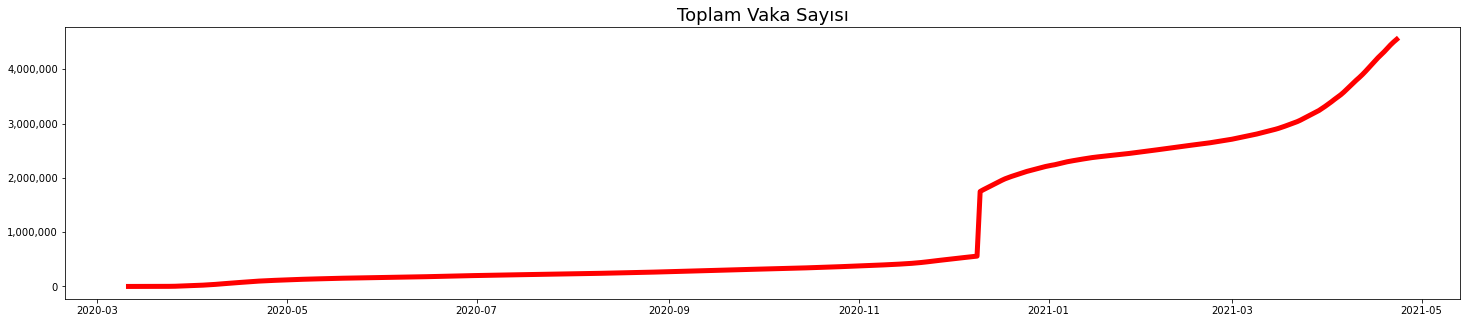

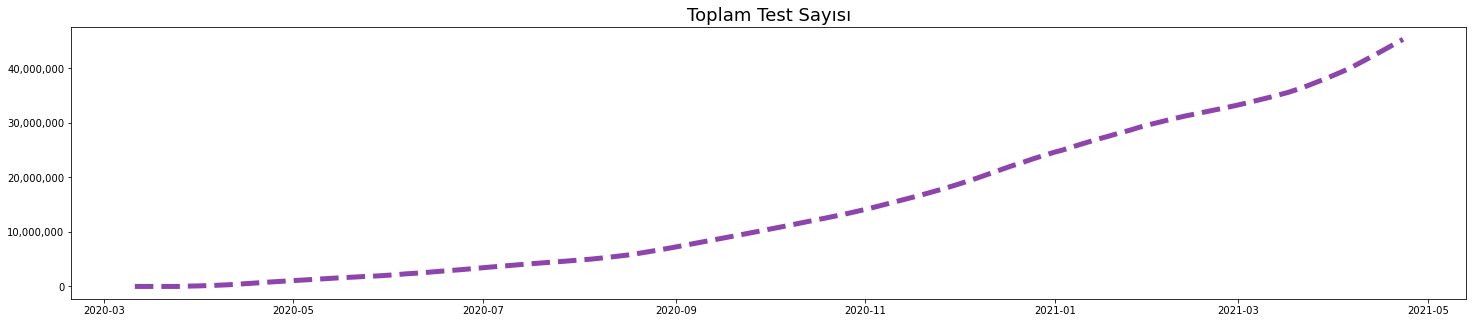

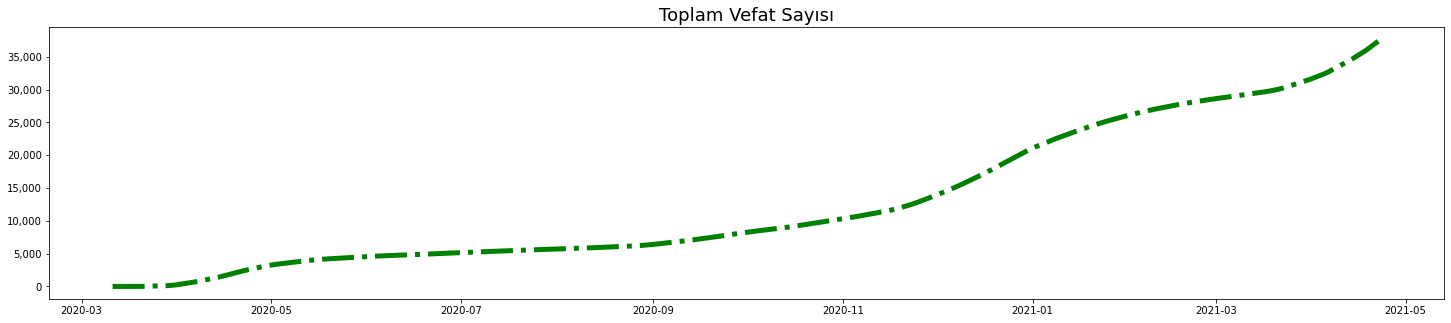

In [19]:

list_select=["Toplam Vaka Sayısı", "Toplam Test Sayısı", "Toplam Vefat Sayısı"]

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vaka Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vaka Sayısı"],lw=5,color="#FF0000")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Test Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Test Sayısı"],"--",lw=5,color="#8E44AD")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vefat Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vefat Sayısı"],"-.",lw=5,color="#008000")

## MODELLER

### SARIMAX

In [25]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [26]:
print("Bugünkü Vaka Sayısı")
print(testStationarity(new_df["Bugünkü Vaka Sayısı"]))

print("Bugünkü Hasta Sayısı")
print(testStationarity(new_df["Bugünkü Hasta Sayısı"]))

print("Bugünkü Vefat Sayısı")
print(testStationarity(new_df["Bugünkü Vefat Sayısı"]))

Bugünkü Vaka Sayısı
Test Statistic                  -1.976590
p-value                          0.296931
#Lags Used                      16.000000
Number of Observations Used    392.000000
Critical Value (1%)             -3.447142
Critical Value (5%)             -2.868941
Critical Value (10%)            -2.570713
dtype: float64
Bugünkü Hasta Sayısı
Test Statistic                  -2.748202
p-value                          0.066062
#Lags Used                      18.000000
Number of Observations Used    390.000000
Critical Value (1%)             -3.447229
Critical Value (5%)             -2.868980
Critical Value (10%)            -2.570733
dtype: float64
Bugünkü Vefat Sayısı
Test Statistic                  -1.981775
p-value                          0.294621
#Lags Used                      15.000000
Number of Observations Used    393.000000
Critical Value (1%)             -3.447099
Critical Value (5%)             -2.868923
Critical Value (10%)            -2.570703
dtype: float64


In [27]:
df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
Toplam Test Sayısı,1.000000,0.958852,0.992950,-0.111126,0.575855,0.957261,0.736845,0.025485,0.886322,0.700019,0.720053
Toplam Vaka Sayısı,0.958852,1.000000,0.975392,-0.235203,0.440884,0.996057,0.748017,-0.088995,0.810009,0.694355,0.794539
Toplam Vefat Sayısı,0.992950,0.975392,1.000000,-0.160073,0.509864,0.976359,0.716248,-0.040399,0.849230,0.671233,0.717795
Hastalarda Zatürre Oranı (%),-0.111126,-0.235203,-0.160073,1.000000,0.022296,-0.231688,-0.228504,-0.068604,0.024679,-0.164659,-0.215952
Ağır Hasta Sayısı,0.575855,0.440884,0.509864,0.022296,1.000000,0.416064,0.606550,0.643223,0.774435,0.799186,0.510991
Toplam İyileşen Hasta Sayısı,0.957261,0.996057,0.976359,-0.231688,0.416064,1.000000,0.708744,-0.128451,0.787535,0.663571,0.767242
Bugünkü Vaka Sayısı,0.736845,0.748017,0.716248,-0.228504,0.606550,0.708744,1.000000,0.377172,0.840092,0.821449,0.874587
Bugünkü Hasta Sayısı,0.025485,-0.088995,-0.040399,-0.068604,0.643223,-0.128451,0.377172,1.000000,0.309674,0.533995,0.176529
Bugünkü Test Sayısı,0.886322,0.810009,0.849230,0.024679,0.774435,0.787535,0.840092,0.309674,1.000000,0.845498,0.786901
Bugünkü Vefat Sayısı,0.700019,0.694355,0.671233,-0.164659,0.799186,0.663571,0.821449,0.533995,0.845498,1.000000,0.810862


#### GÜNLÜK VAKA SAYISI

In [28]:
#!pip install pmdarima

In [29]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7231.789, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7139.862, Time=0.65 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7230.980, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7100.342, Time=1.95 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7107.942, Time=0.53 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7098.135, Time=2.15 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=7134.421, Time=0.86 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.96 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=7098.467, Time=2.69 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=7103.8

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


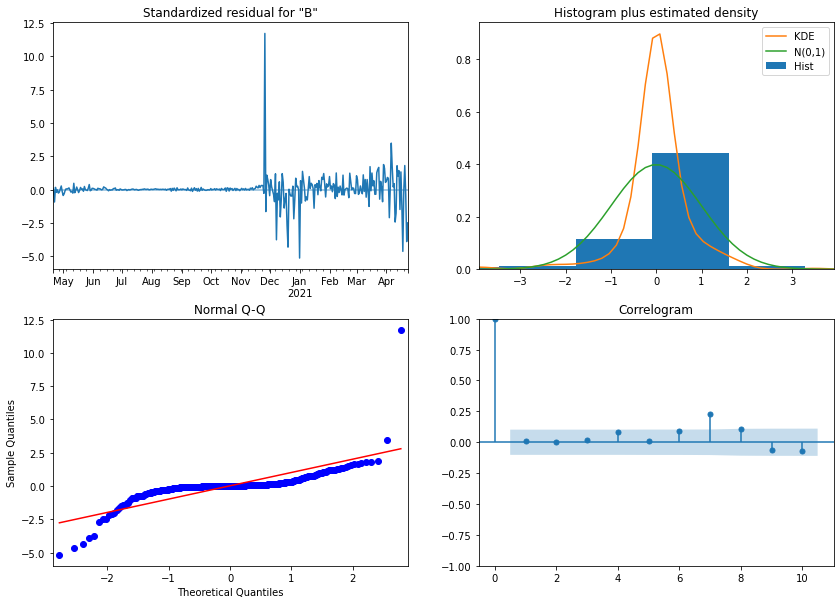

In [30]:
b_vaka_df = new_df["Bugünkü Vaka Sayısı"]
b_vaka_df = pd.DataFrame(b_vaka_df)

results = auto_arima(b_vaka_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)


mod = sm.tsa.statespace.SARIMAX(b_vaka_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_vaka = mod.fit()


results_vaka.plot_diagnostics(figsize=(14,10))
plt.show()

#### GÜNLÜK HASTA SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5719.794, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5590.086, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5721.795, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5547.454, Time=0.93 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5549.060, Time=0.57 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5546.132, Time=0.91 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5588.122, Time=0.42 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.97 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5547.020, Time=0.91 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5538.7

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


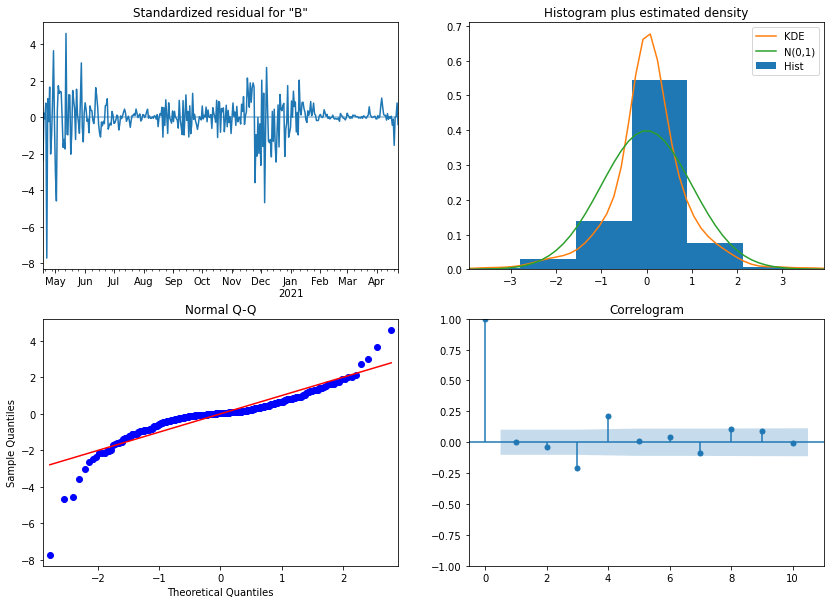

In [31]:
b_hasta_df = new_df["Bugünkü Hasta Sayısı"]
b_hasta_df = pd.DataFrame(b_hasta_df)

results = auto_arima(b_hasta_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_hasta_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_hasta = mod.fit()

results_hasta.plot_diagnostics(figsize=(14,10))
plt.show()

#### GÜNLÜK VEFAT SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2635.736, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2782.806, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2691.349, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2660.358, Time=0.36 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2783.625, Time=0.35 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=2.79 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2686.339, Time=0.45 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2656.561, Time=0.36 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2637.053, Time=1.38 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2652.022, Time=0.94 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2669.864, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2651.940, Time=0.58 sec
 ARIMA(2,1,0)(0,1,1)[12]          

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


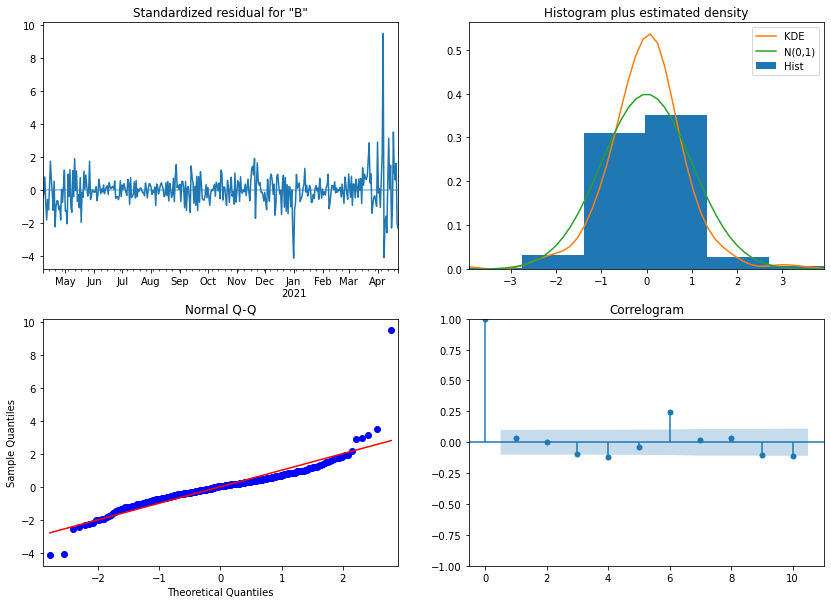

In [32]:
b_vefat_df = new_df["Bugünkü Vefat Sayısı"]
b_vefat_df = pd.DataFrame(b_vefat_df)

results = auto_arima(b_vefat_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_vefat_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_vefat = mod.fit()


results_vefat.plot_diagnostics(figsize=(14,10))
plt.show()

#### GERÇEK VE ÖNGÖRÜLEN DEĞERLERİN KARŞILAŞTIRILMASI

In [112]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_prediction(start=pd.to_datetime('2021-03-01'),dynamic=False)
pred_vaka_ci = pred_vaka.conf_int()

pred_vaka_ci['Predicted'] = (pred_vaka_ci['lower Bugünkü Vaka Sayısı'] + pred_vaka_ci['upper Bugünkü Vaka Sayısı'])/2
pred_vaka_ci['Observed'] = b_vaka_df['Bugünkü Vaka Sayısı']
pred_vaka_ci['Diff, %%'] = ((pred_vaka_ci['Predicted'] / pred_vaka_ci['Observed'])-1) * 100
pred_vaka_ci

,lower Bugünkü Vaka Sayısı,upper Bugünkü Vaka Sayısı,Predicted,Observed,"Diff, %%"
2021-03-01,4182.859715,11664.882276,7923.870995,9891,-19.888070
2021-03-02,6708.952710,14190.975271,10449.963990,11837,-11.717800
2021-03-03,8482.555288,15964.577849,12223.566569,11520,6.107349
2021-03-04,8025.429324,15507.451884,11766.440604,11322,3.925460
2021-03-05,7051.720885,14533.743446,10792.732166,11302,-4.505997
2021-03-06,8189.892797,15671.915357,11930.904077,11770,1.367069
2021-03-07,8054.097042,15536.119602,11795.108322,11187,5.435848
2021-03-08,7372.780030,14854.802591,11113.791310,13215,-15.900179
2021-03-09,10292.657465,17774.680026,14033.668745,13755,2.025945
2021-03-10,9380.022764,16862.045324,13121.034044,14556,-9.858244


In [113]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_prediction(start=pd.to_datetime('2021-03-01'),dynamic=False)
pred_hasta_ci = pred_hasta.conf_int()

pred_hasta_ci['Predicted'] = (pred_hasta_ci['lower Bugünkü Hasta Sayısı'] + pred_hasta_ci['upper Bugünkü Hasta Sayısı'])/2
pred_hasta_ci['Observed'] = b_hasta_df['Bugünkü Hasta Sayısı']
pred_hasta_ci['Diff, %%'] = ((pred_hasta_ci['Predicted'] / pred_hasta_ci['Observed'])-1) * 100
pred_hasta_ci

,lower Bugünkü Hasta Sayısı,upper Bugünkü Hasta Sayısı,Predicted,Observed,"Diff, %%"
2021-03-01,157.078402,1035.373113,596.225757,645,-7.561898
2021-03-02,206.876378,1085.171089,646.023733,668,-3.289860
2021-03-03,243.641831,1121.936542,682.789186,689,-0.901424
2021-03-04,260.676957,1138.971668,699.824313,685,2.164133
2021-03-05,250.851632,1129.146343,689.998988,698,-1.146277
2021-03-06,274.634896,1152.929607,713.782252,702,1.678383
2021-03-07,269.680139,1147.974850,708.827494,735,-3.560885
2021-03-08,311.068714,1189.363426,750.216070,767,-2.188257
2021-03-09,337.328792,1215.623503,776.476148,801,-3.061654
2021-03-10,367.416640,1245.711352,806.563996,814,-0.913514


In [114]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_prediction(start=pd.to_datetime('2021-03-01'),dynamic=False)
pred_vefat_ci = pred_vefat.conf_int()

pred_vefat_ci['Predicted'] = (pred_vefat_ci['lower Bugünkü Vefat Sayısı'] + pred_vefat_ci['upper Bugünkü Vefat Sayısı'])/2
pred_vefat_ci['Observed'] = b_vefat_df['Bugünkü Vefat Sayısı']
pred_vefat_ci['Diff, %%'] = ((pred_vefat_ci['Predicted'] / pred_vefat_ci['Observed'])-1) * 100
pred_vefat_ci

,lower Bugünkü Vefat Sayısı,upper Bugünkü Vefat Sayısı,Predicted,Observed,"Diff, %%"
2021-03-01,49.663205,75.401556,62.532381,69,-9.373362
2021-03-02,53.548043,79.286394,66.417219,68,-2.327619
2021-03-03,54.973310,80.711661,67.842486,65,4.373055
2021-03-04,49.556984,75.295335,62.426160,68,-8.196824
2021-03-05,55.173441,80.911792,68.042616,62,9.746155
2021-03-06,48.578511,74.316862,61.447686,64,-3.987990
2021-03-07,49.771048,75.509392,62.640220,65,-3.630431
2021-03-08,54.168227,79.906570,67.037398,64,4.745935
2021-03-09,48.701009,74.439352,61.570180,66,-6.711848
2021-03-10,53.094967,78.833309,65.964138,67,-1.546062


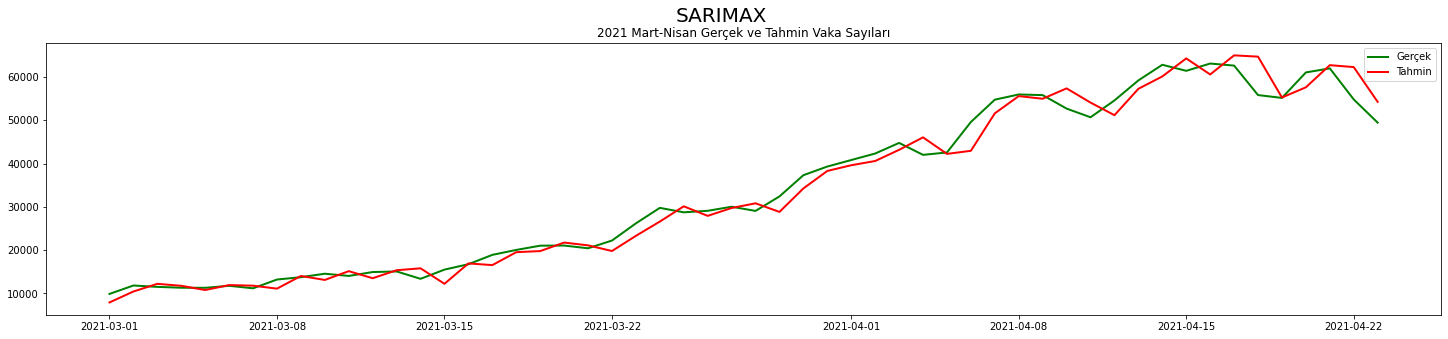

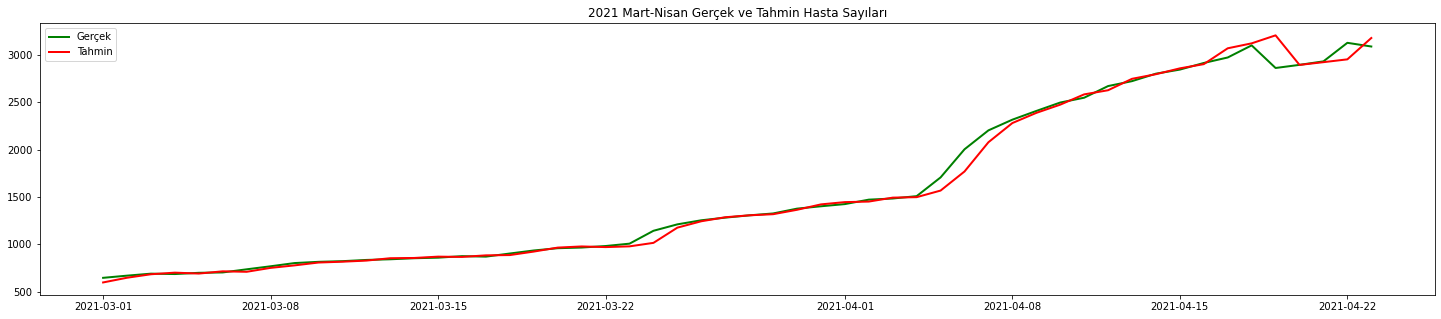

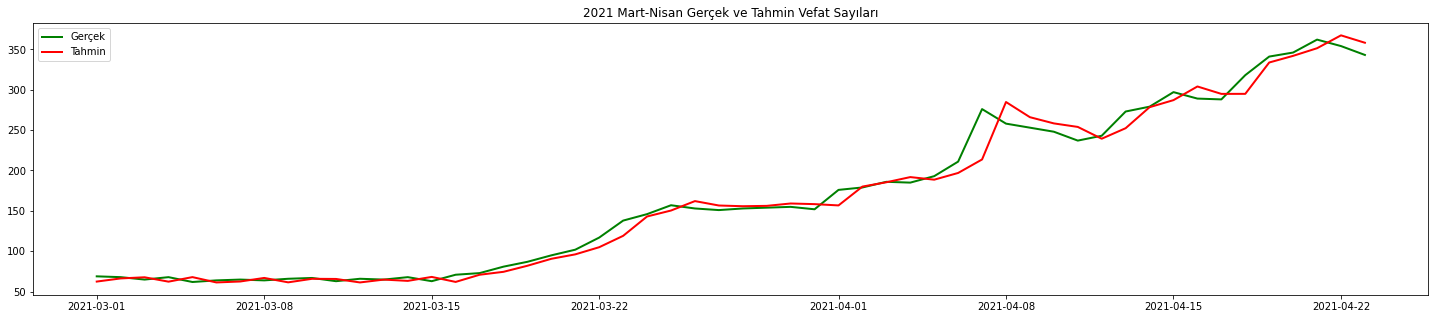

In [115]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Vaka Sayıları")
ax.plot(pred_vaka_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vaka_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

fig, ax = plt.subplots(figsize=(25,5))
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Hasta Sayıları")
ax.plot(pred_hasta_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_hasta_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

fig, ax = plt.subplots(figsize=(25,5))
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Vefat Sayıları")
ax.plot(pred_vefat_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vefat_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
plt.show()

#### İLERİ TARİHLİ TAHMİNLEME

In [37]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_forecast(steps=4)
pred_vaka_ci = pred_vaka.conf_int()

value = pred_vaka.predicted_mean.copy() 
value.index = pd.DatetimeIndex(["2021-05-01","2021-06-01","2021-07-01","2021-08-01"])
value = pd.DataFrame(value)
value.columns = ["Vaka Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vaka Sayısı"]
dff_vaka = pd.concat([b_vaka_df, deneme])

In [38]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_forecast(steps=4)
pred_hasta_ci = pred_hasta.conf_int()

value = pred_hasta.predicted_mean.copy() 
value.index = pd.DatetimeIndex(["2021-05-01","2021-06-01","2021-07-01","2021-08-01"])
value = pd.DataFrame(value)
value.columns = ["Hasta Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Hasta Sayısı"]
dff_hasta = pd.concat([b_hasta_df, deneme])

In [39]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_forecast(steps=4)
pred_vefat_ci = pred_vefat.conf_int()

value = pred_vefat.predicted_mean.copy() 
value.index = pd.DatetimeIndex(["2021-05-01","2021-06-01","2021-07-01","2021-08-01"])
value = pd.DataFrame(value)
value.columns = ["Vefat Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vefat Sayısı"]
dff_vefat = pd.concat([b_vefat_df, deneme])

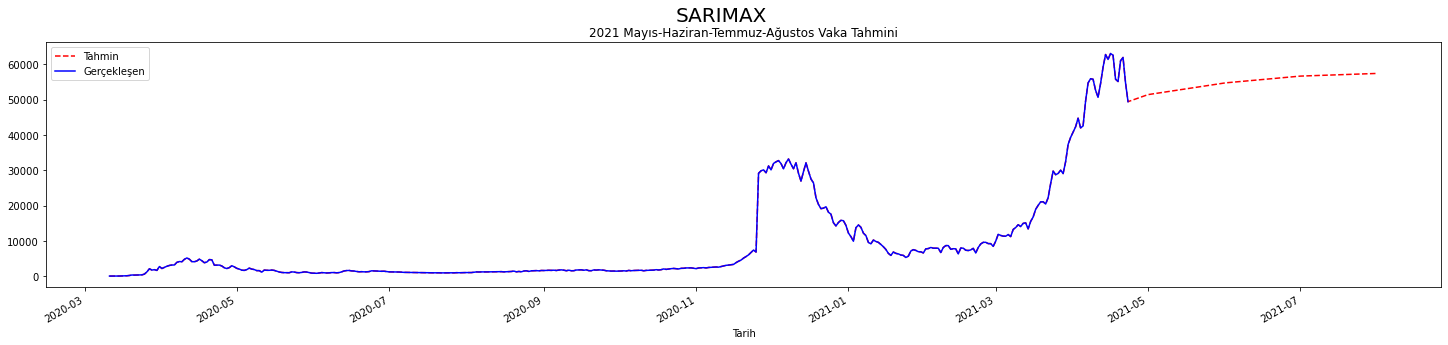

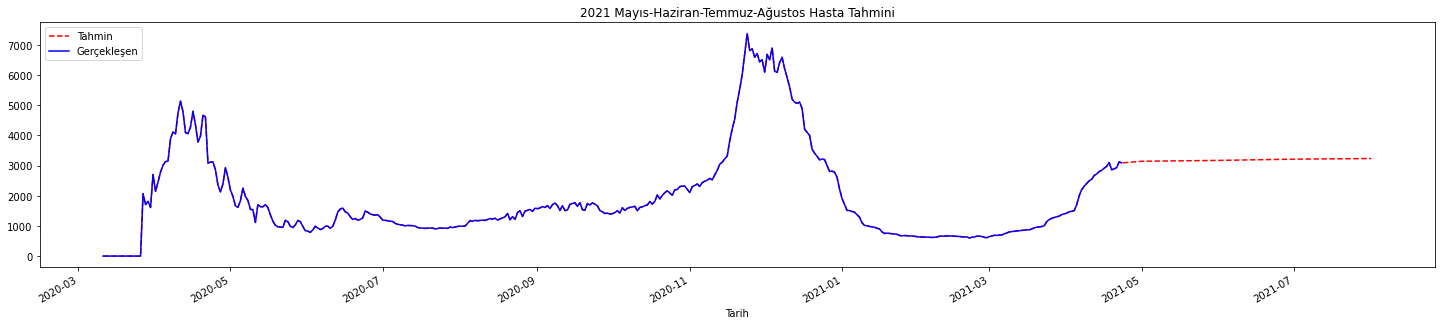

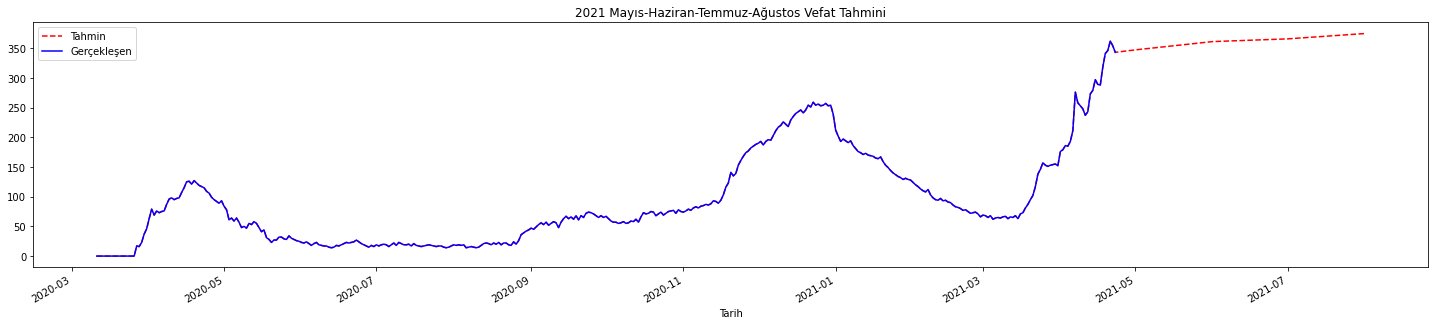

In [110]:
plt.figure(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
dff_vaka["Bugünkü Vaka Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vaka Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vaka_df["Bugünkü Vaka Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")

plt.figure(figsize=(25,5))
dff_hasta["Bugünkü Hasta Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Hasta Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_hasta_df["Bugünkü Hasta Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")

plt.figure(figsize=(25,5))
dff_vefat["Bugünkü Vefat Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vefat Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vefat_df["Bugünkü Vefat Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")

In [41]:
sarimax_rmse = np.sqrt(results_vaka.mse)
sarimax_mae = results_vaka.mae

print("RMSE :", sarimax_rmse)
print("MAE :", sarimax_mae)

RMSE : 1816.6241008384304
MAE : 742.6673512779491


### MAKİNE ÖĞRENMESİ

In [20]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [21]:
ml_df = df.copy()
ml_df['Tarih'] = pd.to_datetime(ml_df['Tarih'], format='%Y-%m-%d')
ml_df['Gün'] = ml_df['Tarih'].dt.day
ml_df['Ay'] = ml_df['Tarih'].dt.month
ml_df['Yıl'] = ml_df['Tarih'].dt.year
ml_df.drop('Tarih', axis=1, inplace=True)
ml_df

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
0,0,1,0,0.0,0,0,1,0,0,0,0,11,3,2020
1,0,1,0,0.0,0,0,0,0,0,0,0,12,3,2020
2,0,5,0,0.0,0,0,4,0,0,0,0,13,3,2020
3,0,6,0,0.0,0,0,1,0,0,0,0,14,3,2020
4,0,18,0,0.0,0,0,12,0,0,0,0,15,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,44087628,4323596,36267,2.9,3319,3736537,55149,2862,318869,341,48947,19,4,2021
405,44409756,4384624,36613,2.9,3375,3792129,61028,2895,322128,346,55592,20,4,2021
406,44728595,4446591,36975,2.9,3398,3844342,61967,2932,318839,362,52213,21,4,2021
407,45040704,4501382,37329,2.9,3463,3909935,54791,3128,312109,354,65593,22,4,2021


In [48]:
ml_df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Toplam Test Sayısı,1.000000,0.958852,0.992950,-0.111126,0.575855,0.957261,0.736845,0.025485,0.886322,0.700019,0.720053,-0.021164,-0.271847,0.869770
Toplam Vaka Sayısı,0.958852,1.000000,0.975392,-0.235203,0.440884,0.996057,0.748017,-0.088995,0.810009,0.694355,0.794539,-0.010418,-0.439257,0.909402
Toplam Vefat Sayısı,0.992950,0.975392,1.000000,-0.160073,0.509864,0.976359,0.716248,-0.040399,0.849230,0.671233,0.717795,-0.022295,-0.345992,0.904234
Hastalarda Zatürre Oranı (%),-0.111126,-0.235203,-0.160073,1.000000,0.022296,-0.231688,-0.228504,-0.068604,0.024679,-0.164659,-0.215952,-0.054088,0.433496,-0.243127
Ağır Hasta Sayısı,0.575855,0.440884,0.509864,0.022296,1.000000,0.416064,0.606550,0.643223,0.774435,0.799186,0.510991,-0.016303,0.430473,0.194786
Toplam İyileşen Hasta Sayısı,0.957261,0.996057,0.976359,-0.231688,0.416064,1.000000,0.708744,-0.128451,0.787535,0.663571,0.767242,-0.006265,-0.462697,0.924449
Bugünkü Vaka Sayısı,0.736845,0.748017,0.716248,-0.228504,0.606550,0.708744,1.000000,0.377172,0.840092,0.821449,0.874587,-0.039976,-0.065403,0.516920
Bugünkü Hasta Sayısı,0.025485,-0.088995,-0.040399,-0.068604,0.643223,-0.128451,0.377172,1.000000,0.309674,0.533995,0.176529,-0.002112,0.531253,-0.292463
Bugünkü Test Sayısı,0.886322,0.810009,0.849230,0.024679,0.774435,0.787535,0.840092,0.309674,1.000000,0.845498,0.786901,-0.021727,0.067100,0.609620
Bugünkü Vefat Sayısı,0.700019,0.694355,0.671233,-0.164659,0.799186,0.663571,0.821449,0.533995,0.845498,1.000000,0.810862,0.013555,0.032752,0.450573


In [22]:
X = ml_df.drop(["Bugünkü Vaka Sayısı"], axis=1)
y = ml_df["Bugünkü Vaka Sayısı"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### XGBOOTS

In [50]:
import xgboost as xg

In [51]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 20, seed = 123)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [52]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_r.predict(X_test)))
xgb_mae = mean_absolute_error(y_test, xgb_r.predict(X_test))

print("RMSE :", xgb_rmse)
print("MAE :", xgb_mae)

RMSE : 1205.0575635058647
MAE : 539.3917921112804


D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [53]:
xgb_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": xgb_r.predict(X_test)}).sort_index()

D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [54]:
xgb_tahmin_df['Tarih'] = np.nan
for i in range(len(xgb_tahmin_df)):
    for j in range(len(df)):
        if(xgb_tahmin_df.iloc[i].name == df.index[j]):
            xgb_tahmin_df["Tarih"][j] = df["Tarih"][j]

<ipython-input-54-3ec99799e04e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_tahmin_df["Tarih"][j] = df["Tarih"][j]


In [55]:
xgb_tahmin_df.index = xgb_tahmin_df["Tarih"]
xgb_tahmin_df.index = pd.DatetimeIndex(xgb_tahmin_df.index)
xgb_tahmin_df.drop(["Tarih"], axis=1, inplace=True)

In [56]:
xgb_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,54.791164
2020-03-15,12,54.791164
2020-03-16,29,54.791164
2020-03-17,51,54.791164
2020-03-18,93,171.302505
...,...,...
2021-04-07,54740,52005.914062
2021-04-12,54562,54030.410156
2021-04-13,59187,56904.617188


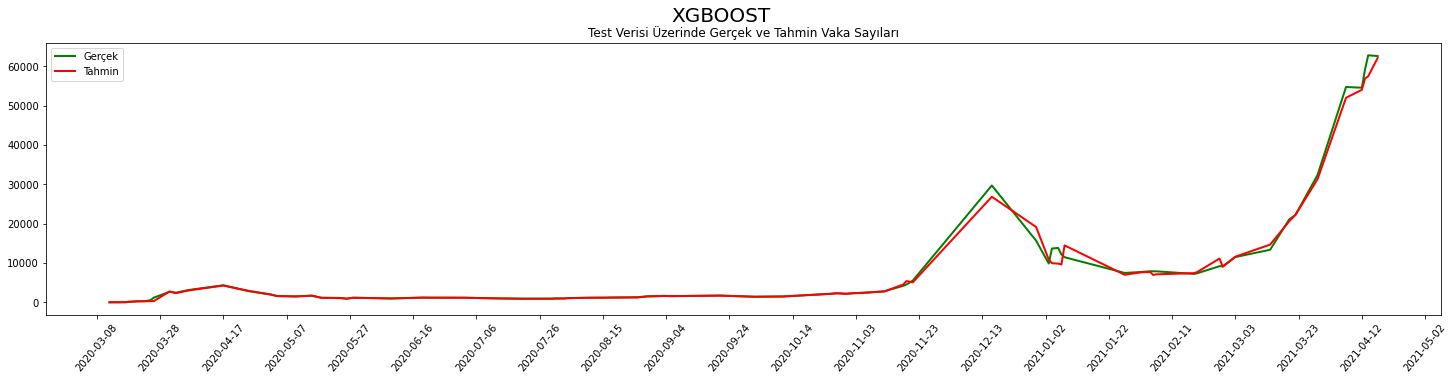

In [57]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('XGBOOST', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(xgb_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(xgb_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### SKLEARN

In [58]:
sklearn_model = LinearRegression().fit(X_train,y_train)

In [59]:
sklearn_rmse = np.sqrt(mean_squared_error(y_test, sklearn_model.predict(X_test)))
sklearn_mae = mean_absolute_error(y_test, sklearn_model.predict(X_test))

print("RMSE :", sklearn_rmse)
print("MAE :", sklearn_mae)

RMSE : 3911.36666749888
MAE : 2999.8430147098334


In [60]:
sklearn_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": sklearn_model.predict(X_test)}).sort_index()

In [61]:
sklearn_tahmin_df['Tarih'] = np.nan
for i in range(len(sklearn_tahmin_df)):
    for j in range(len(df)):
        if(sklearn_tahmin_df.iloc[i].name == df.index[j]):
            sklearn_tahmin_df["Tarih"][j] = df["Tarih"][j]

<ipython-input-61-1082f1ffadf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sklearn_tahmin_df["Tarih"][j] = df["Tarih"][j]


In [62]:
sklearn_tahmin_df.index = sklearn_tahmin_df["Tarih"]
sklearn_tahmin_df.index = pd.DatetimeIndex(sklearn_tahmin_df.index)
sklearn_tahmin_df.drop(["Tarih"], axis=1, inplace=True)

In [63]:
sklearn_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,-643.353370
2020-03-15,12,-1385.737836
2020-03-16,29,-1633.000469
2020-03-17,51,-1878.150168
2020-03-18,93,-2122.941927
...,...,...
2021-04-07,54740,46761.358309
2021-04-12,54562,54215.124186
2021-04-13,59187,56994.127623


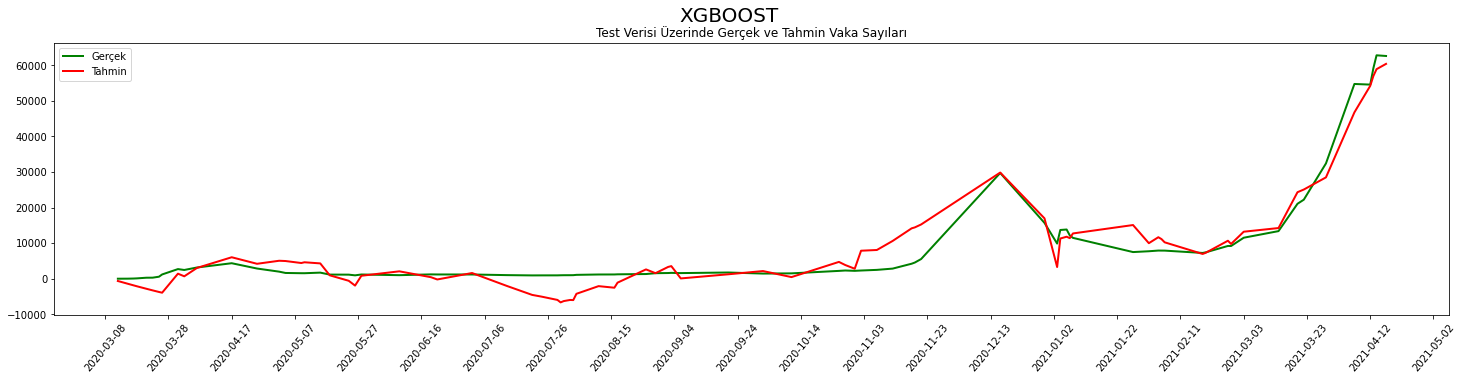

In [64]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('XGBOOST', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(sklearn_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(sklearn_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### DESICION TREE REGRESSOR

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor().fit(X_train,y_train)

In [66]:
dt_regressor_rmse = np.sqrt(mean_squared_error(y_test, dt_regressor.predict(X_test)))
dt_regressor_mae = mean_absolute_error(y_test, dt_regressor.predict(X_test))

print("RMSE :", dt_regressor_rmse)
print("MAE :", dt_regressor_mae)

RMSE : 1282.13611773097
MAE : 520.5853658536586


In [67]:
dc_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": dt_regressor.predict(X_test)}).sort_index()

In [68]:
dc_tahmin_df['Tarih'] = np.nan
for i in range(len(dc_tahmin_df)):
    for j in range(len(df)):
        if(dc_tahmin_df.iloc[i].name == df.index[j]):
            dc_tahmin_df["Tarih"][j] = df["Tarih"][j]

<ipython-input-68-84b15302e2c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_tahmin_df["Tarih"][j] = df["Tarih"][j]


In [69]:
dc_tahmin_df.index = dc_tahmin_df["Tarih"]
dc_tahmin_df.index = pd.DatetimeIndex(dc_tahmin_df.index)
dc_tahmin_df.drop(["Tarih"], axis=1, inplace=True)

In [70]:
dc_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,1.0
2020-03-15,12,1.0
2020-03-16,29,1.0
2020-03-17,51,1.0
2020-03-18,93,168.0
...,...,...
2021-04-07,54740,49584.0
2021-04-12,54562,55802.0
2021-04-13,59187,55791.0


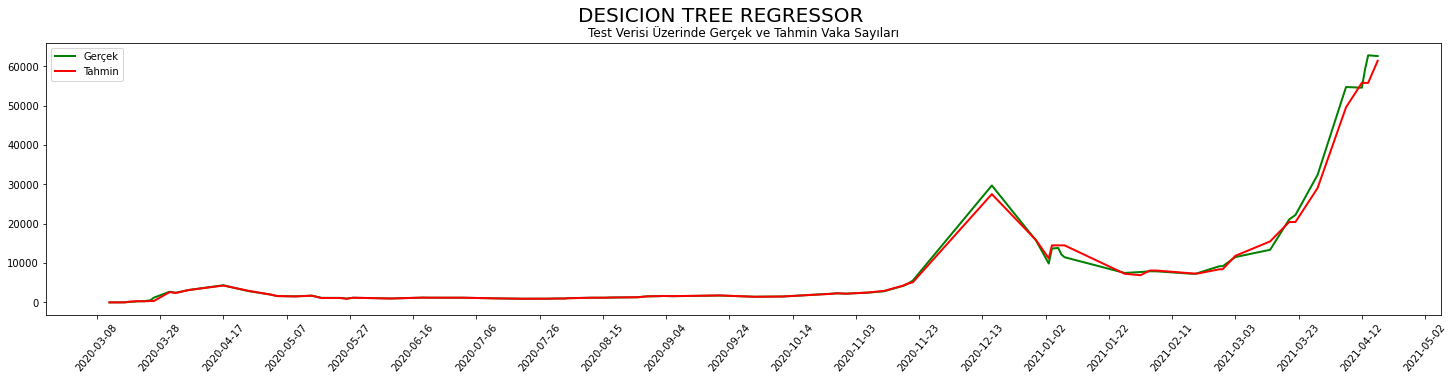

In [71]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('DESICION TREE REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(dc_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(dc_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### TENSORFLOW

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [77]:
tf_df = df.copy()

In [78]:
tf_df['Tarih'] = pd.to_datetime(tf_df['Tarih'], format='%Y-%m-%d')
tf_df['Gün'] = tf_df['Tarih'].dt.day
tf_df['Ay'] = tf_df['Tarih'].dt.month
tf_df['Yıl'] = tf_df['Tarih'].dt.year
tf_df.drop(["Tarih"], axis=1, inplace=True)
tf_df

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
0,0,1,0,0.0,0,0,1,0,0,0,0,11,3,2020
1,0,1,0,0.0,0,0,0,0,0,0,0,12,3,2020
2,0,5,0,0.0,0,0,4,0,0,0,0,13,3,2020
3,0,6,0,0.0,0,0,1,0,0,0,0,14,3,2020
4,0,18,0,0.0,0,0,12,0,0,0,0,15,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,44087628,4323596,36267,2.9,3319,3736537,55149,2862,318869,341,48947,19,4,2021
405,44409756,4384624,36613,2.9,3375,3792129,61028,2895,322128,346,55592,20,4,2021
406,44728595,4446591,36975,2.9,3398,3844342,61967,2932,318839,362,52213,21,4,2021
407,45040704,4501382,37329,2.9,3463,3909935,54791,3128,312109,354,65593,22,4,2021


In [79]:
#tf_df.index = tf_df["Tarih"]
#tf_df.index = pd.DatetimeIndex(tf_df.index)
#tf_df.drop(["Tarih"], axis=1, inplace=True)

In [80]:
X_tf = tf_df.drop(["Bugünkü Vaka Sayısı"], axis=1)
y_tf = tf_df["Bugünkü Vaka Sayısı"]
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, test_size = 0.20, random_state = 0)

In [83]:
scaler = MinMaxScaler()

X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

In [84]:
tf_model = Sequential()

tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))

tf_model.add(Dense(1))

tf_model.compile(optimizer = "adam", loss = "mse")

In [85]:
tf_model.fit(x = X_train_tf, y = y_train_tf, validation_data = (X_test_tf, y_test_tf), batch_size = 50, epochs = 500)

Epoch 1/500
7/7 [==============================] - 5s 105ms/step - loss: 225301474.0000 - val_loss: 272150240.0000
Epoch 2/500
7/7 [==============================] - 0s 27ms/step - loss: 244121142.0000 - val_loss: 272149632.0000
Epoch 3/500
7/7 [==============================] - 0s 26ms/step - loss: 246489074.0000 - val_loss: 272148928.0000
Epoch 4/500
7/7 [==============================] - 0s 20ms/step - loss: 277912318.0000 - val_loss: 272147968.0000
Epoch 5/500
7/7 [==============================] - 0s 18ms/step - loss: 280861258.0000 - val_loss: 272146336.0000
Epoch 6/500
7/7 [==============================] - 0s 22ms/step - loss: 274127958.0000 - val_loss: 272143296.0000
Epoch 7/500
7/7 [==============================] - 0s 22ms/step - loss: 278549920.0000 - val_loss: 272136992.0000
Epoch 8/500
7/7 [==============================] - 0s 21ms/step - loss: 263316630.0000 - val_loss: 272123104.0000
Epoch 9/500
7/7 [==============================] - 0s 22ms/step - loss: 266236594.0000 

In [86]:
kayipVeri = pd.DataFrame(tf_model.history.history)
kayipVeri

,loss,val_loss
0,276244672.0,2.721502e+08
1,276244096.0,2.721496e+08
2,276243328.0,2.721489e+08
3,276242496.0,2.721480e+08
4,276241056.0,2.721463e+08
...,...,...
495,4769347.5,2.619374e+06
496,4811854.0,2.598993e+06
497,4746345.5,2.448509e+06
498,5011051.5,2.606429e+06


<AxesSubplot:>

<Figure size 1800x504 with 0 Axes>

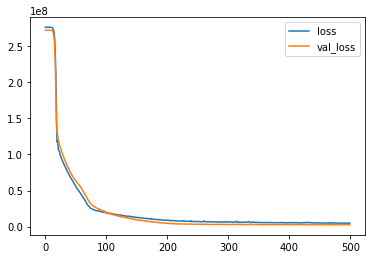

In [109]:
kayipVeri.plot()

In [88]:
tahmin_dizi = tf_model.predict(X_test_tf)

In [89]:
trainLoss = tf_model.evaluate(X_train_tf, y_train_tf, verbose = 0)
testLoss = tf_model.evaluate(X_test_tf, y_test_tf, verbose = 0)

print(trainLoss)
print(testLoss)

4850130.0
2378981.75


In [90]:
tf_rmse = np.sqrt(mean_squared_error(y_test_tf, tf_model.predict(X_test_tf)))
tf_mae = mean_absolute_error(y_test_tf, tf_model.predict(X_test_tf))

print("RMSE :", tf_rmse)
print("MAE :", tf_mae)

RMSE : 1542.3948480292752
MAE : 892.3929688988662


In [91]:
tf_tahmin_df = pd.DataFrame(y_test_tf.values, columns = ["Gerçek Vaka Test"])

test_tahmin = pd.Series(tahmin_dizi.reshape(len(tf_tahmin_df),))

tf_tahmin_df = pd.concat([tf_tahmin_df, test_tahmin], axis = 1)
tf_tahmin_df.columns = ["Gerçek Vaka Test", "Tahmin Vaka Test"]
tf_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
0,2483,2470.454346
1,13695,14067.427734
2,13830,13977.756836
3,9205,8592.914062
4,1192,1679.234375
...,...,...
77,1158,1193.758301
78,2704,1907.126465
79,1183,1642.132446
80,561,1017.333069


In [93]:
tf_tahmin_df['Tarih'] = np.nan
for i in range(len(tf_tahmin_df)):
    for j in range(len(df)):
        if(tf_tahmin_df["Gerçek Vaka Test"][i] == df["Bugünkü Vaka Sayısı"][j]):
            tf_tahmin_df["Tarih"][i] = df["Tarih"][j]

<ipython-input-93-83af50e1b5b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_tahmin_df["Tarih"][i] = df["Tarih"][j]


In [95]:
tf_tahmin_df.index = tf_tahmin_df["Tarih"]
tf_tahmin_df.index = pd.DatetimeIndex(tf_tahmin_df.index)
tf_tahmin_df.drop(["Tarih"], axis=1, inplace=True)
tf_tahmin_df = tf_tahmin_df.sort_index(axis = 0)
tf_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,1031.607422
2020-03-15,12,1013.511230
2020-03-16,29,1009.355347
2020-03-17,51,1005.190186
2020-03-18,93,1001.026794
...,...,...
2021-04-07,54740,52503.789062
2021-04-12,54562,57074.496094
2021-04-13,59187,56790.683594


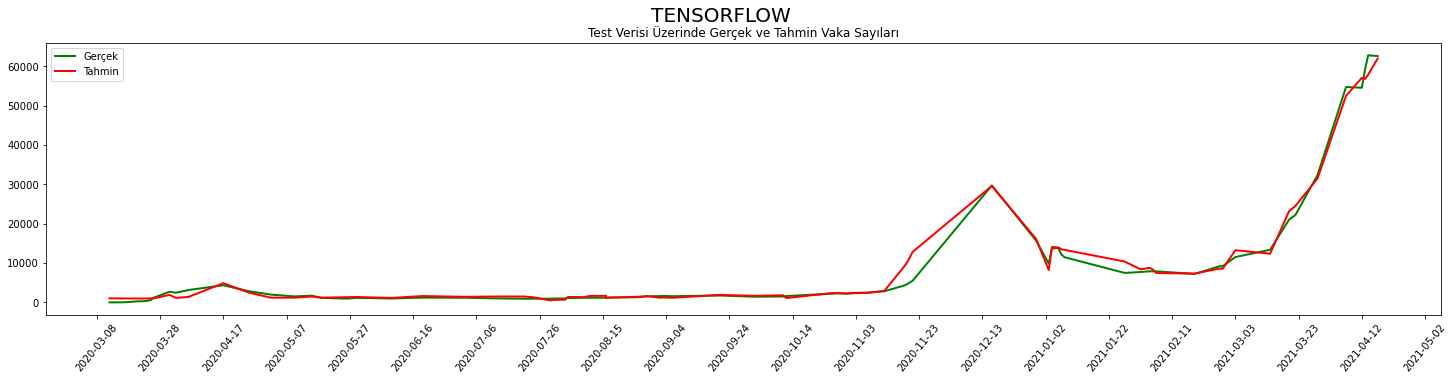

In [98]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('TENSORFLOW', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(tf_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(tf_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

### GRADIENT BOOSTING REGRESSOR

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
params = {'n_estimators': 500,
          'max_depth': 10,
          'min_samples_split': 20,
          'learning_rate': 0.9,
          'loss': 'ls'}

gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.9, max_depth=10, min_samples_split=20,
                          n_estimators=500)

In [101]:
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_model.predict(X_test)))
gbr_mae = mean_absolute_error(y_test, gbr_model.predict(X_test))

print("RMSE :", gbr_rmse)
print("MAE :", gbr_mae)

RMSE : 1140.1923195767283
MAE : 535.1746368512851


In [102]:
gbr_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": gbr_model.predict(X_test)}).sort_index()

In [103]:
gbr_tahmin_df['Tarih'] = np.nan
for i in range(len(gbr_tahmin_df)):
    for j in range(len(df)):
        if(gbr_tahmin_df.iloc[i].name == df.index[j]):
            gbr_tahmin_df["Tarih"][j] = df["Tarih"][j]

<ipython-input-103-6b70269a6685>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_tahmin_df["Tarih"][j] = df["Tarih"][j]


In [104]:
gbr_tahmin_df.index = gbr_tahmin_df["Tarih"]
gbr_tahmin_df.index = pd.DatetimeIndex(gbr_tahmin_df.index)
gbr_tahmin_df.drop(["Tarih"], axis=1, inplace=True)
gbr_tahmin_df

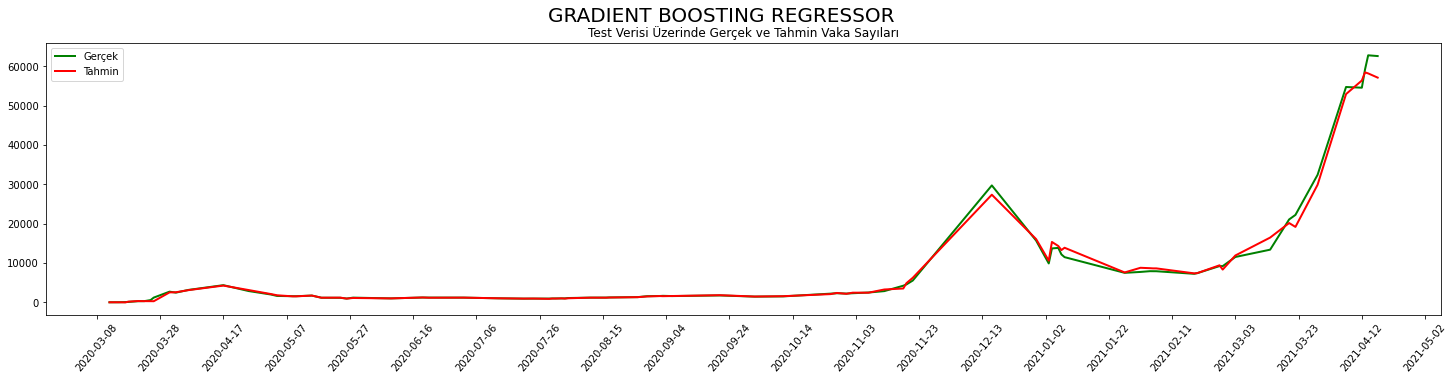

In [108]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('GRADIENT BOOSTING REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(gbr_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(gbr_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

## MODELLERİN KARŞILAŞTIRILMASI

In [763]:
model_comp = pd.DataFrame({'Models': ["SARIMAX", "XGBOOST", "SKLEARN", "DESICION TREE", "GRADIENT BOOSTING", "TENSORFLOW"], 
                           'RMSE': [sarimax_rmse, xgb_rmse, sklearn_rmse, dt_regressor_rmse, gbr_rmse, tf_rmse],
                           'MAE': [sarimax_mae, xgb_mae, sklearn_mae, dt_regressor_mae, gbr_mae, tf_mae]})
model_comp = model_comp.sort_values(by="RMSE",axis=0, ascending = False).reset_index(drop=True)
model_comp

,Models,RMSE,MAE
0,SKLEARN,3911.366667,2999.843015
1,SARIMAX,1816.624101,742.667351
2,DESICION TREE,1321.380242,537.987805
3,TENSORFLOW,1242.064782,589.816544
4,XGBOOST,1205.057564,539.391792
5,GRADIENT BOOSTING,1089.382905,501.340468


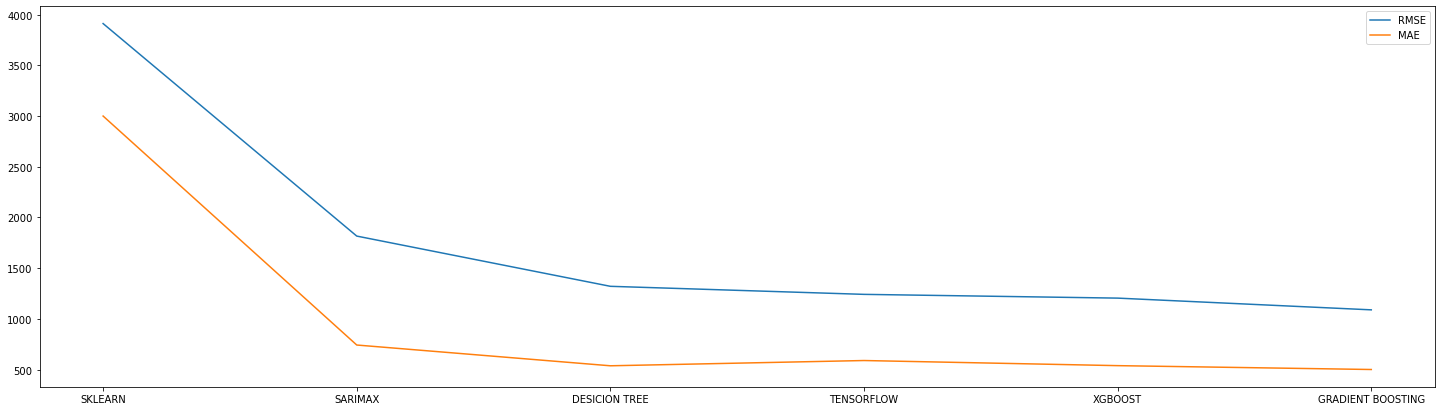

In [766]:
plt.figure(figsize=(25,7))
plt.plot(model_comp['Models'], model_comp['RMSE'], label = "RMSE")
plt.plot(model_comp['Models'], model_comp['MAE'], label = "MAE")
plt.legend()
plt.show()